# Build QA for the 2% sprint output files

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import numpy as np
import warnings

In [3]:
# Note that you need the standard desi/conda dependencies + matplotlib, 
# basemap, and healpy to run this notebook.
import fitsio
import matplotlib.pyplot as plt
from astropy.table import Table

In [4]:
from desitarget import desi_mask, bgs_mask, mws_mask, contam_mask
from desiutil.plots import init_sky, plot_sky_binned
from desiutil.log import get_logger

In [5]:
log = get_logger()

## Read the data

In [10]:
topdir = os.path.join(os.getenv('DESI_ROOT'), 'datachallenge', 'dc17a')
targfile = os.path.join(topdir, 'targets.fits')
truthfile = os.path.join(topdir, 'truth.fits')
skyfile = os.path.join(topdir, 'sky.fits')
stddarkfile = os.path.join(topdir, 'standards-dark.fits')
stdbrightfile = os.path.join(topdir, 'standards-bright.fits')

In [7]:
log.info('Reading {}'.format(targfile))
ff = fitsio.FITS(targfile)
print(ff[1])
targets = ff[1].read(upper=True)

INFO:<ipython-input-7-e61e9e3dffeb>:1:<module>: Reading /Users/ioannis/research/projects/desi/datachallenge/dc17a/targets.fits

  file: /Users/ioannis/research/projects/desi/datachallenge/dc17a/targets.fits
  extension: 1
  type: BINARY_TBL
  rows: 22409814
  column info:
    TARGETID            i8  
    RA                  f8  
    DEC                 f8  
    DESI_TARGET         i8  
    BGS_TARGET          i8  
    MWS_TARGET          i8  
    SUBPRIORITY         f8  
    OBSCONDITIONS       i4  
    BRICKNAME          S10  
    DECAM_FLUX          f4  array[6]
    WISE_FLUX           f4  array[2]
    SHAPEEXP_R          f4  
    SHAPEEXP_E1         f4  
    SHAPEEXP_E2         f4  
    SHAPEDEV_R          f4  
    SHAPEDEV_E1         f4  
    SHAPEDEV_E2         f4  
    DECAM_DEPTH         f4  array[6]
    DECAM_GALDEPTH      f4  array[6]
    EBV                 f4  


In [8]:
log.info('Reading {}'.format(truthfile))
ff = fitsio.FITS(truthfile)
print(ff[1])
truth = ff[1].read(upper=True)

INFO:<ipython-input-8-b2d03af3b019>:1:<module>: Reading /Users/ioannis/research/projects/desi/datachallenge/dc17a/truth.fits

  file: /Users/ioannis/research/projects/desi/datachallenge/dc17a/truth.fits
  extension: 1
  type: BINARY_TBL
  rows: 22409814
  column info:
    TARGETID            i8  
    MOCKID              i8  
    CONTAM_TARGET       i8  
    TRUEZ               f4  
    TRUESPECTYPE       S10  
    TEMPLATETYPE       S10  
    TEMPLATESUBTYPE    S10  
    TEMPLATEID          i4  
    SEED                i8  
    MAG                 f4  
    DECAM_FLUX          f4  array[6]
    WISE_FLUX           f4  array[2]
    OIIFLUX             f4  
    HBETAFLUX           f4  
    TEFF                f4  
    LOGG                f4  
    FEH                 f4  


In [9]:
log.info('Reading {}'.format(skyfile))
ff = fitsio.FITS(skyfile)
print(ff[1])
sky = ff[1].read(upper=True)

INFO:<ipython-input-9-3e3f33b7ca22>:1:<module>: Reading /Users/ioannis/research/projects/desi/datachallenge/dc17a/sky.fits

  file: /Users/ioannis/research/projects/desi/datachallenge/dc17a/sky.fits
  extension: 1
  type: BINARY_TBL
  rows: 4885646
  column info:
    TARGETID            i8  
    RA                  f8  
    DEC                 f8  
    DESI_TARGET         i8  
    BGS_TARGET          i8  
    MWS_TARGET          i8  
    SUBPRIORITY         f8  
    OBSCONDITIONS       i4  
    BRICKNAME          S10  
    DECAM_FLUX          f4  array[6]
    WISE_FLUX           f4  array[2]
    SHAPEEXP_R          f4  
    SHAPEEXP_E1         f4  
    SHAPEEXP_E2         f4  
    SHAPEDEV_R          f4  
    SHAPEDEV_E1         f4  
    SHAPEDEV_E2         f4  
    DECAM_DEPTH         f4  array[6]
    DECAM_GALDEPTH      f4  array[6]
    EBV                 f4  


In [11]:
log.info('Reading {}'.format(stddarkfile))
ff = fitsio.FITS(stddarkfile)
print(ff[1])
stddark = ff[1].read(upper=True)

INFO:<ipython-input-11-71e858f8507a>:1:<module>: Reading /Users/ioannis/research/projects/desi/datachallenge/dc17a/standards-dark.fits

  file: /Users/ioannis/research/projects/desi/datachallenge/dc17a/standards-dark.fits
  extension: 1
  type: BINARY_TBL
  rows: 38701
  column info:
    TARGETID            i8  
    RA                  f8  
    DEC                 f8  
    DESI_TARGET         i8  
    BGS_TARGET          i8  
    MWS_TARGET          i8  
    SUBPRIORITY         f8  
    OBSCONDITIONS       i4  
    BRICKNAME          S10  
    DECAM_FLUX          f4  array[6]
    WISE_FLUX           f4  array[2]
    SHAPEEXP_R          f4  
    SHAPEEXP_E1         f4  
    SHAPEEXP_E2         f4  
    SHAPEDEV_R          f4  
    SHAPEDEV_E1         f4  
    SHAPEDEV_E2         f4  
    DECAM_DEPTH         f4  array[6]
    DECAM_GALDEPTH      f4  array[6]
    EBV                 f4  


In [12]:
log.info('Reading {}'.format(stdbrightfile))
ff = fitsio.FITS(stdbrightfile)
print(ff[1])
stdbright = ff[1].read(upper=True)

INFO:<ipython-input-12-921f665d5f56>:1:<module>: Reading /Users/ioannis/research/projects/desi/datachallenge/dc17a/standards-bright.fits

  file: /Users/ioannis/research/projects/desi/datachallenge/dc17a/standards-bright.fits
  extension: 1
  type: BINARY_TBL
  rows: 5263
  column info:
    TARGETID            i8  
    RA                  f8  
    DEC                 f8  
    DESI_TARGET         i8  
    BGS_TARGET          i8  
    MWS_TARGET          i8  
    SUBPRIORITY         f8  
    OBSCONDITIONS       i4  
    BRICKNAME          S10  
    DECAM_FLUX          f4  array[6]
    WISE_FLUX           f4  array[2]
    SHAPEEXP_R          f4  
    SHAPEEXP_E1         f4  
    SHAPEEXP_E2         f4  
    SHAPEDEV_R          f4  
    SHAPEDEV_E1         f4  
    SHAPEDEV_E2         f4  
    DECAM_DEPTH         f4  array[6]
    DECAM_GALDEPTH      f4  array[6]
    EBV                 f4  


## Visualize the "observed" target densities

In [17]:
def qadensity(cat, objtype, targdens=None, max_bin_area=1.0):
    label = '{} (targets/deg$^2$)'.format(objtype)
    if targdens:
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    else:
        fig, ax = plt.subplots(1)
    ax = np.atleast_1d(ax)
       
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        basemap = init_sky(galactic_plane_color='k', ax=ax[0]);
        data, area, _ = plot_sky_binned(cat['RA'], cat['DEC'], max_bin_area=max_bin_area,
                                        clip_lo='!1', cmap='jet', plot_type='healpix', 
                                        label=label, basemap=basemap)
    if targdens:
        dens = data.compressed()
        ax[1].hist(dens, bins=100, histtype='stepfilled', alpha=0.6, label='Observed {} Density'.format(objtype))
        if objtype in targdens.keys():
            ax[1].axvline(x=targdens[objtype], ls='--', color='k', label='Goal {} Density'.format(objtype))
        ax[1].set_xlabel(label)
        ax[1].set_ylabel('Number of Healpixels')
        ax[1].legend(loc='upper left', frameon=False)
        fig.subplots_adjust(wspace=0.2)

In [15]:
# Desired target densities, including contaminants.
targdens = {'ELG': 2400, 'LRG': 350, 'QSO': 260, 'SKY': 1400}

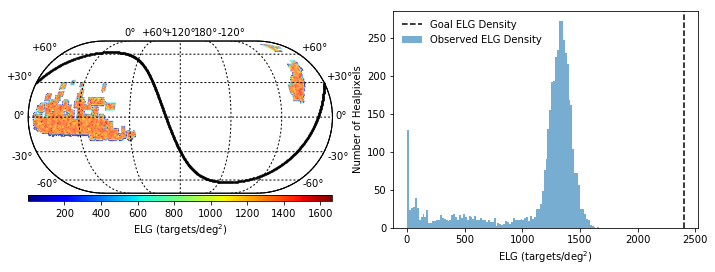

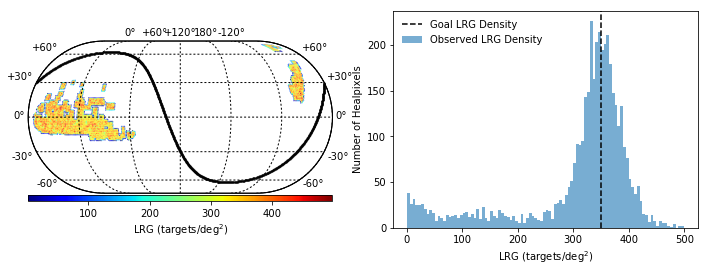

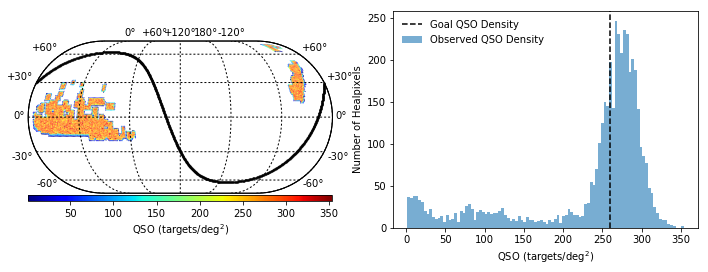

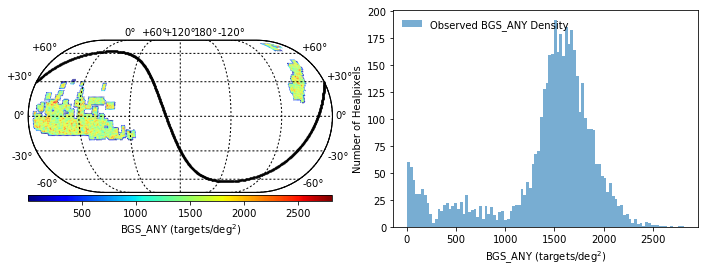

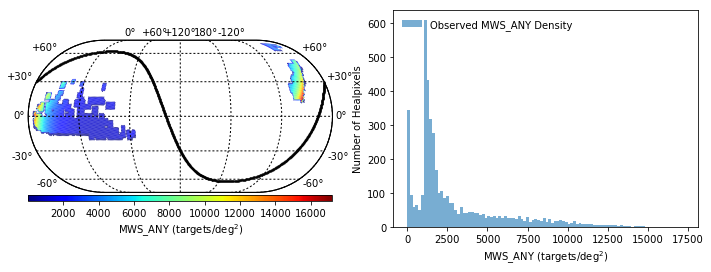

In [12]:
for obj in ('ELG', 'LRG', 'QSO', 'BGS_ANY', 'MWS_ANY'):
    these = np.where((targets['DESI_TARGET'] & desi_mask.mask(obj)) != 0)[0]
    qadensity(targets[these], obj, targdens)

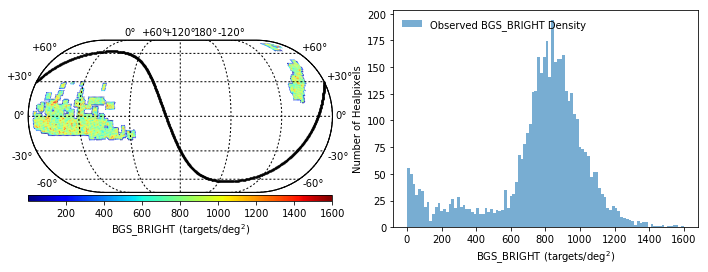

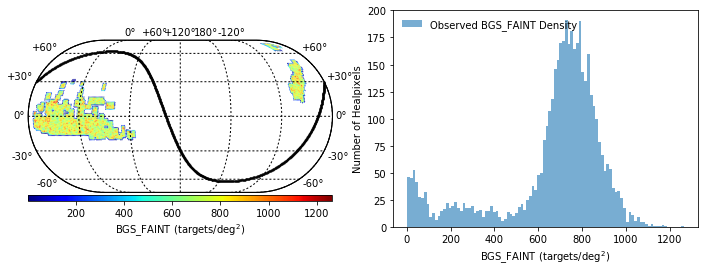

In [13]:
for obj in ('BGS_BRIGHT', 'BGS_FAINT'):
    these = np.where((targets['BGS_TARGET'] & bgs_mask.mask(obj)) != 0)[0]
    qadensity(targets[these], obj, targdens)

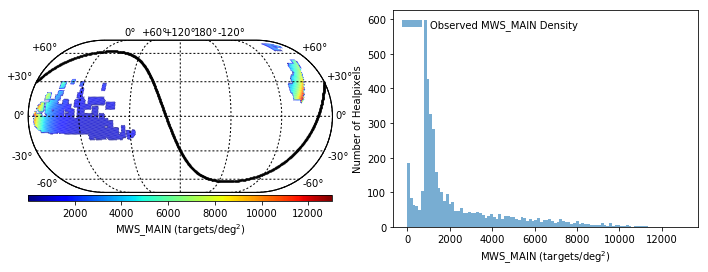

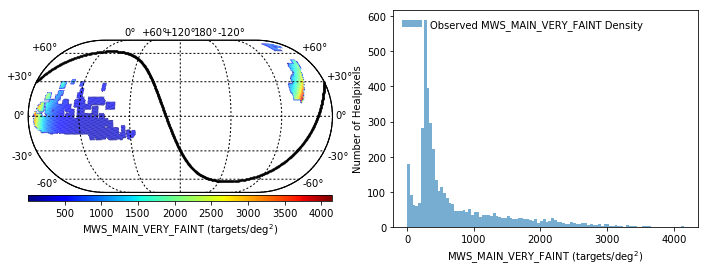

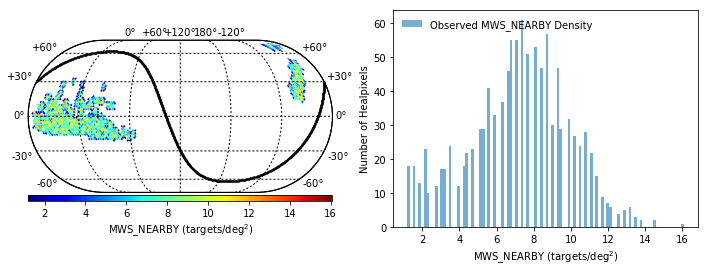

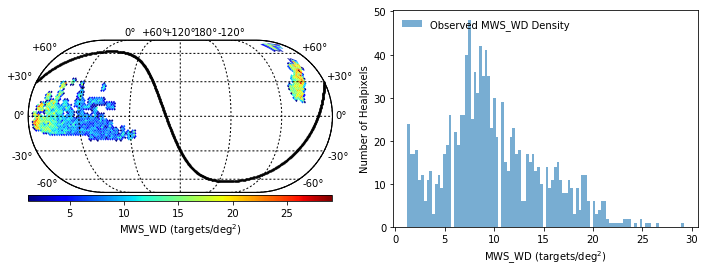

In [14]:
binarea = (2.0, 2.0, 10.0, 10.0) # [deg2]
for obj, area in zip( ('MWS_MAIN', 'MWS_MAIN_VERY_FAINT', 'MWS_NEARBY', 'MWS_WD'), binarea ):
    these = np.where((targets['MWS_TARGET'] & mws_mask.mask(obj)) != 0)[0]
    qadensity(targets[these], obj, targdens, max_bin_area=area)

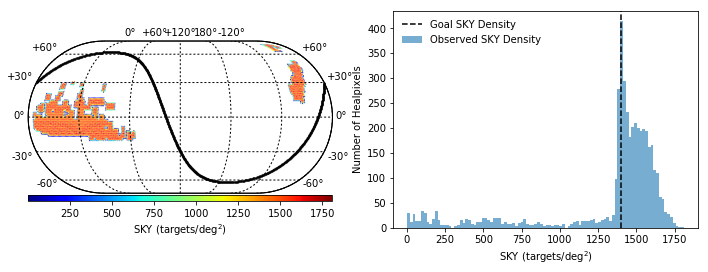

In [15]:
obj = 'SKY'
these = np.where((sky['DESI_TARGET'] & desi_mask.mask(obj)) != 0)[0]
qadensity(sky[these], obj, targdens)

## Visualize true targets and contaminants

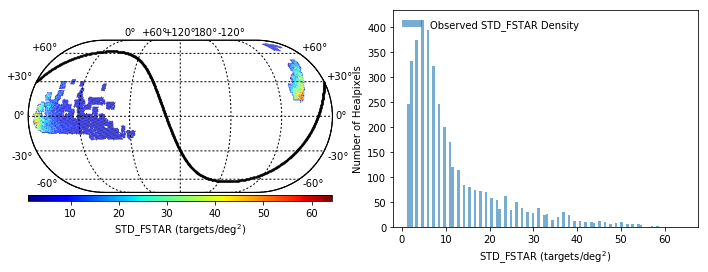

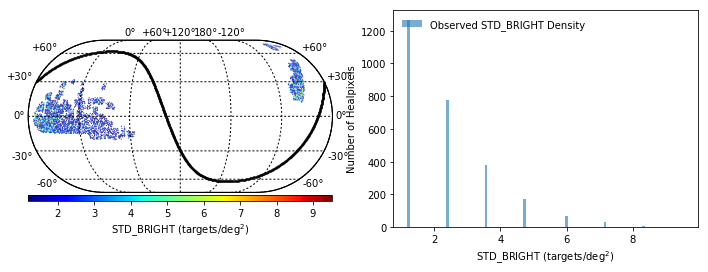

In [20]:
for cat, obj in zip( (stddark, stdbright), ('STD_FSTAR', 'STD_BRIGHT') ):
    these = np.where((cat['DESI_TARGET'] & desi_mask.mask(obj)) != 0)[0]
    qadensity(cat[these], obj, targdens)

In [16]:
def healpix_density(data):
    """Determine the target density given an input catalog using code 
    shamelessly taken from desiutil.plot.plot_sky_binned (by D. Kirkby).

    nside = 64 corresponds to about 0.210 deg2, about a factor of 3 smaller
    than the nominal imaging brick area (0.25x0.25=0.625 deg2), as determined 
    by this snippet of code:

      max_bin_area = 0.5
      for n in range(1, 10):
          nside = 2 ** n
          bin_area = hp.nside2pixarea(nside, degrees=True)
          print(nside, bin_area)
          if bin_area <= max_bin_area:
              break
    """
    import healpy as hp
        
    nside = 32
    npix = hp.nside2npix(nside)
    bin_area = hp.nside2pixarea(nside, degrees=True)

    pixels = hp.ang2pix(nside, np.radians(90 - data['DEC']), 
                        np.radians(data['RA']), nest=False)
    counts = np.bincount(pixels, weights=None, minlength=npix)
    dens = counts[np.flatnonzero(counts)] / bin_area
            
    return dens

In [17]:
def qso_density(targets, truth):
    """Determine the target density of QSOs (including contaminants)."""
    
    dens = dict()
    
    these = np.where(targets['DESI_TARGET'] & desi_mask.mask('QSO') != 0)[0]
    dens['QSO_TARGETS'] = healpix_density(targets[these])

    these = np.where((targets['DESI_TARGET'] & desi_mask.mask('QSO') != 0) * (truth['TRUEZ'] < 2.1))[0]
    dens['QSO_TRACER'] = healpix_density(targets[these])

    these = np.where((targets['DESI_TARGET'] & desi_mask.mask('QSO') != 0) * (truth['TRUEZ'] >= 2.1))[0]
    dens['QSO_LYA'] = healpix_density(targets[these])
    
    these = np.where((targets['DESI_TARGET'] & desi_mask.mask('QSO') != 0) * 
                     (truth['CONTAM_TARGET'] & contam_mask.mask('QSO_IS_GALAXY')) != 0)[0]
    dens['QSO_IS_GALAXY'] = healpix_density(targets[these])

    these = np.where((targets['DESI_TARGET'] & desi_mask.mask('QSO') != 0) * 
                     (truth['CONTAM_TARGET'] & contam_mask.mask('QSO_IS_STAR')) != 0)[0]
    dens['QSO_IS_STAR'] = healpix_density(targets[these])
    
    return dens

In [18]:
dens = qso_density(targets, truth)

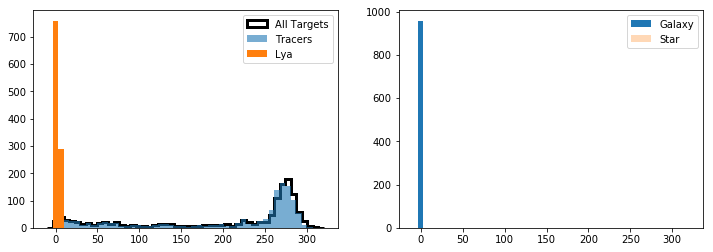

In [19]:
bins = 50
lim = (-10, 320)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(dens['QSO_TARGETS'], bins=bins, range=lim, label='All Targets', color='k', lw=3, histtype='step')
ax[0].hist(dens['QSO_TRACER'], bins=bins, range=lim, alpha=0.6, ls='--', lw=2, label='Tracers')#, histtype='step')
ax[0].hist(dens['QSO_LYA'], bins=bins, range=lim, lw=2, label='Lya')
ax[0].legend(loc='upper right')

ax[1].hist(dens['QSO_IS_GALAXY'], bins=bins, range=lim, label='Galaxy')
ax[1].hist(dens['QSO_IS_STAR'], bins=bins, range=lim, alpha=0.3, label='Star')
ax[1].legend(loc='upper right')

In [20]:
these = np.where((targets['DESI_TARGET'] & desi_mask.mask('QSO') != 0) * 
                 (truth['CONTAM_TARGET'] & contam_mask.mask('QSO_IS_GALAXY')) != 0)[0]
print(these)
print(len(these))
print(healpix_density(targets[these]))

[    1540     7970    14416 ..., 22185989 22215303 22260284]
2751
[ 0.29786953  0.29786953  0.59573905  0.59573905  0.89360858  0.89360858
  0.59573905  0.59573905  0.59573905  0.89360858  0.29786953  0.29786953
  0.59573905  0.89360858  0.29786953  0.59573905  0.29786953  0.29786953
  0.59573905  0.29786953  0.29786953  0.59573905  0.29786953  0.59573905
  0.29786953  0.29786953  0.89360858  0.29786953  0.29786953  0.59573905
  0.59573905  0.29786953  0.29786953  0.89360858  0.59573905  0.29786953
  0.89360858  0.29786953  1.1914781   0.89360858  0.89360858  0.59573905
  0.59573905  0.29786953  0.89360858  0.59573905  0.59573905  0.59573905
  0.59573905  0.59573905  0.89360858  0.59573905  0.59573905  0.29786953
  0.89360858  0.29786953  0.29786953  0.29786953  0.89360858  0.29786953
  0.29786953  0.29786953  0.29786953  0.59573905  0.89360858  0.59573905
  0.29786953  0.29786953  0.29786953  0.29786953  0.59573905  0.59573905
  0.29786953  0.29786953  0.59573905  0.59573905  0.297869

In [21]:
truth['TRUEZ'][these]

array([ 1.13998353,  0.83618766,  0.90073991, ...,  1.2298795 ,
        0.82990432,  1.1457963 ], dtype=float32)